<a href="https://colab.research.google.com/github/wlachape/MAT-421/blob/main/Homework11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 11

Numerical Error and Instability

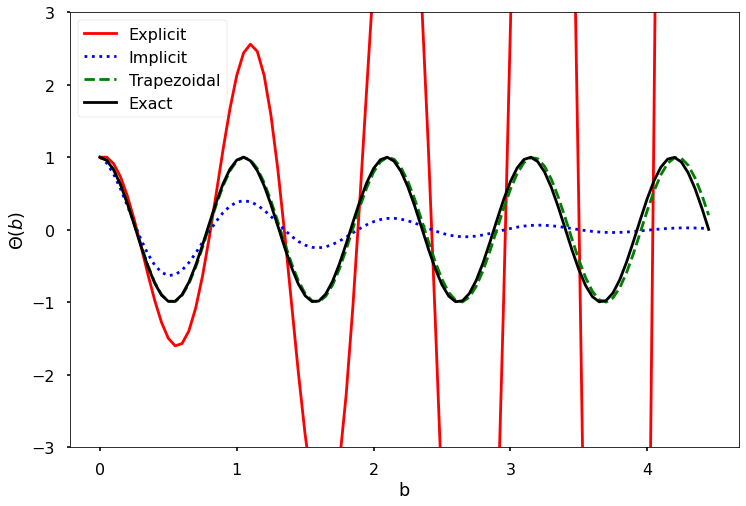

In [4]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

a = 0.05

b = np.arange(0, 4.5, a)

c = 6
s0 = np.array([[1], [0]])

m_e = np.array([[1, a], 
               [-c**2*a, 1]])
m_i = inv(np.array([[1, -a], 
               [c**2*a, 1]]))
m_t = np.dot(inv(np.array([[1, -a/2], 
    [c**2*a/2,1]])), np.array(
      [[1,a/2], [-c**2*a/2, 1]]))

s1 = np.zeros((len(b), 2))
s2 = np.zeros((len(b), 2))
s3 = np.zeros((len(b), 2))


s1[0, :] = s0.T
s2[0, :] = s0.T
s3[0, :] = s0.T

for j in range(0, len(b)-1):
    s1[j+1, :] = np.dot(m_e,s1[j, :])
    s2[j+1, :] = np.dot(m_i,s2[j, :])
    s3[j+1, :] = np.dot(m_t,s3[j, :])

plt.figure(figsize = (12, 8))
plt.plot(b,s1[:,0],'r-')
plt.plot(b,s2[:,0],'b:')
plt.plot(b,s3[:,0],'g--')
plt.plot(b, np.cos(c*b), 'k')
plt.ylim([-3, 3])
plt.xlabel('b')
plt.ylabel('$\Theta (b)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

Predictor-Corrector Methods

In [34]:
def f(x, y):
    a = y - 2 * x * x + 1;
    return a;
 
def predict(x, y, b):
     
    y1p = y + b * f(x, y);
    return y1p;
 
def correct(x, y, x1, y1, b):
     
    c = 0.00001;
    y1c = y1;
 
    while (abs(y1c - y1) > c + 1):
        y1 = y1c;
        y1c = y + 0.5 * b * (f(x, y) + f(x1, y1));
 
    return y1c;
 
def printFinalValues(x, xn, y, b):
    while (x < xn):
        x1 = x + b;
        y1p = predict(x, y, b);
        y1c = correct(x, y, x1, y1p, b);
        x = x1;
        y = y1c;
 
    print("The final value of y at x =",
                     int(x), "is :", y);
 
if __name__ == '__main__':
     
    x = 0; y = 1.2;
 
    xn = 1;
 
    b = 0.05;
 
    printFinalValues(x, xn, y, b);

The final value of y at x = 1 is : 4.058734360225601


Python ODE Solvers

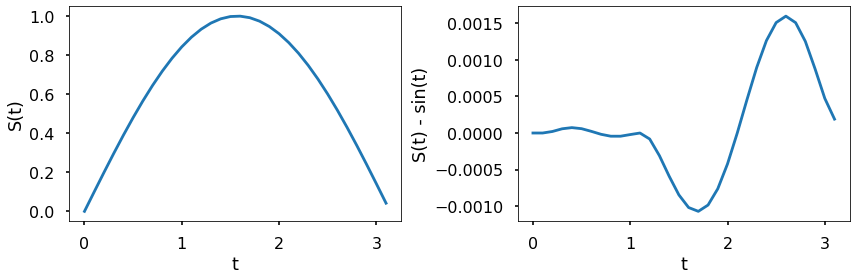

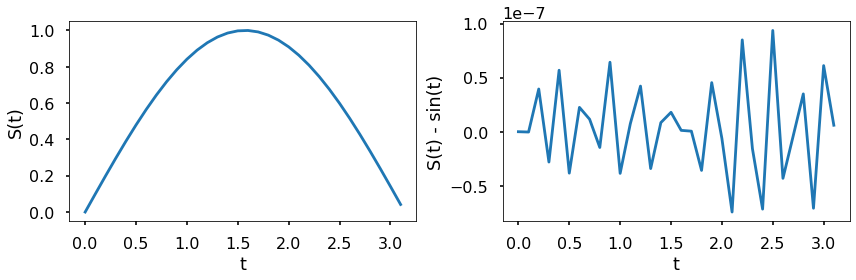

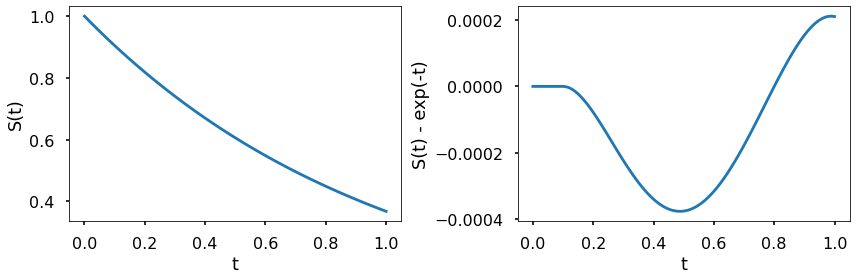

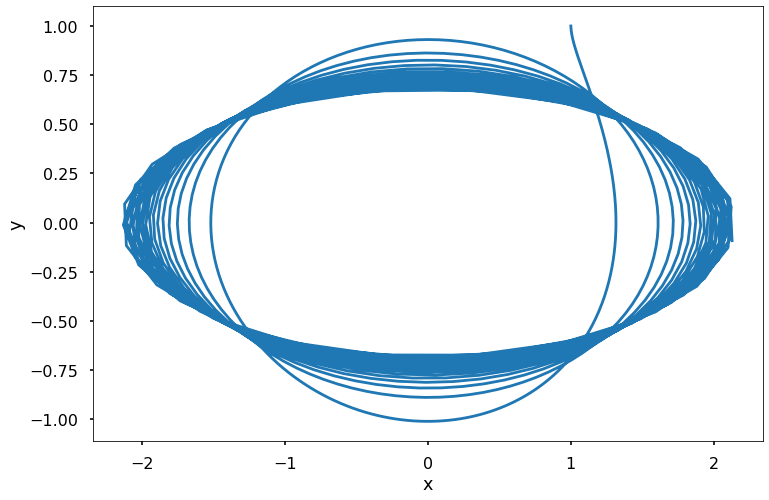

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
%matplotlib inline
F = lambda t, s: np.cos(t)
t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
 rtol = 1e-8, atol = 1e-8)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

F = lambda t, s: -s
t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)
t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)
plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()